In [1]:
import pandas as pd
xr=pd.read_excel("Group 1.xlsx")

In [2]:
xr.head()

,temperature_ambient,temperature_coolant,voltage_direct,voltage_quadrature,current_direct,current_quadrature,voltage_module,current_module,speed_motor,torque,temperature_stator_yoke,temperature_stator_tooth,temperature_stator_winding
0,-0.2738,-1.07,0.180,1.6813,-0.756,-0.2550,1.6900,0.799,2.00,-0.2550,-0.8000,-0.4536,-0.3313
1,-0.2738,-1.07,-1.243,0.4830,-1.357,0.2360,1.3850,1.377,2.00,0.2870,-0.2770,0.3882,0.7125
2,-0.2738,-1.07,-1.560,-0.5040,-1.832,0.3426,1.6244,1.847,2.00,0.4358,0.1258,1.0378,1.5199
3,-0.2738,-1.07,0.298,0.9577,1.029,-0.2457,1.0581,1.058,-0.14,-0.2590,-1.5560,-1.6960,-1.7670
4,-0.2738,-1.07,-0.963,0.6420,0.386,1.1368,1.2006,1.205,-0.14,1.0205,-1.0530,-0.9620,-0.8456


In [3]:
input_val=xr[["temperature_ambient","temperature_coolant","voltage_direct","voltage_quadrature","current_direct","current_quadrature","voltage_module","current_module"]]

In [4]:
input_arr=input_val.to_numpy()

In [5]:
Ys=xr[["temperature_stator_tooth"]]

In [6]:
Ys=Ys.to_numpy()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.kernel_ridge import KernelRidge

In [8]:
import numpy as np

In [9]:
X_train, X_test, y_train, y_test = train_test_split(input_arr,Ys, test_size=0.1, random_state=19)

In [10]:
# Create a linear regression model
model = LinearRegression()
# model=KernelRidge()
# model=BayesianRidge()
# model = RandomForestRegressor()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.013418737447586714


In [12]:
# # Get the coefficients and intercept
# coefficients = model.coef_
# intercept = model.intercept_

# # Print the linear function
# linear_function = "y = {} + {} * x".format(intercept, coefficients[0])
# print("Linear Function:", linear_function)

(60, 8)
(60, 1)


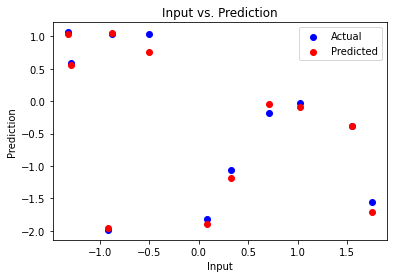

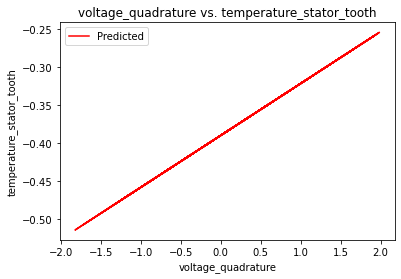

In [13]:
import matplotlib.pyplot as plt
# Make predictions on the test data
x=np.zeros((8,60))
x[0]=np.full(60,-0.603)
x[1]=np.full(60,-0.393)
x[2]=np.full(60,-0.359)
x[3]=np.random.uniform(-2, 2, 60)
x[4]=np.full(60,0.0834)
x[5]=np.full(60,0.231)
x[6]=np.full(60,1.26) 
x[7]=np.full(60,1.19) 
varying_val=x[3].reshape((60,1))
x=x.T
print(x.shape)
print(varying_val.shape)
y_pred = model.predict(x)
pred=model.predict(X_test)
y=model.predict(X_test)
# Plot the input vs. predictions
plt.scatter(X_test.T[3].reshape(y_test.shape), y_test, color='b', label='Actual')
plt.scatter(X_test.T[3].reshape(y_test.shape), pred, color='r', label='Predicted')
plt.xlabel('Input')
plt.ylabel('Prediction')
plt.title('Input vs. Prediction')
plt.legend()
plt.show()
plt.clf()
plt.plot(varying_val, y_pred, color='r', label='Predicted')

plt.xlabel('voltage_quadrature')
plt.ylabel('temperature_stator_tooth')
plt.title('voltage_quadrature vs. temperature_stator_tooth')
plt.legend()
plt.show()

Mean Squared Error: 0.027418770475548707
(60, 8)
(60, 1)


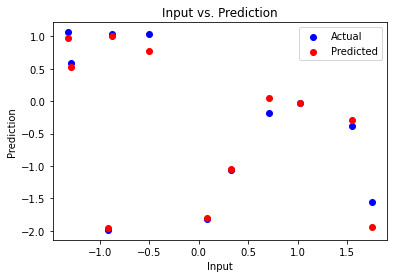

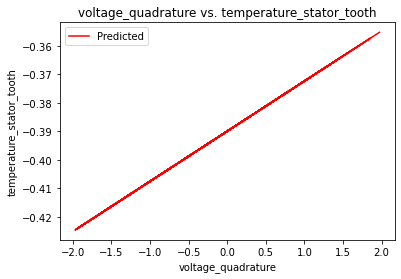

In [17]:
# model = LinearRegression()
model=KernelRidge()
# model=BayesianRidge()
# model = RandomForestRegressor()
# Train the model
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
import matplotlib.pyplot as plt
# Make predictions on the test data
x=np.zeros((8,60))
x[0]=np.full(60,-0.603)
x[1]=np.full(60,-0.393)
x[2]=np.full(60,-0.359)
x[3]=np.random.uniform(-2, 2, 60)
x[4]=np.full(60,0.0834)
x[5]=np.full(60,0.231)
x[6]=np.full(60,1.26) 
x[7]=np.full(60,1.19) 
varying_val=x[3].reshape((60,1))
x=x.T
print(x.shape)
print(varying_val.shape)
y_pred = model.predict(x)
pred=model.predict(X_test)
y=model.predict(X_test)
# Plot the input vs. predictions
plt.scatter(X_test.T[3].reshape(y_test.shape), y_test, color='b', label='Actual')
plt.scatter(X_test.T[3].reshape(y_test.shape), pred, color='r', label='Predicted')
plt.xlabel('Input')
plt.ylabel('Prediction')
plt.title('Input vs. Prediction')
plt.legend()
plt.show()
plt.clf()
plt.plot(varying_val, y_pred, color='r', label='Predicted')

plt.xlabel('voltage_quadrature')
plt.ylabel('temperature_stator_tooth')
plt.title('voltage_quadrature vs. temperature_stator_tooth')
plt.legend()
plt.show()

Mean Squared Error: 0.013439083349353604
(60, 8)
(60, 1)


D:\Anakonda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


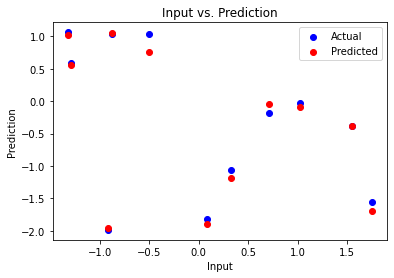

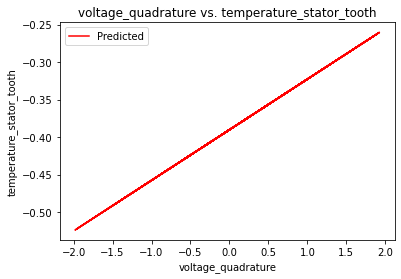

In [15]:
# model = LinearRegression()
# model=KernelRidge()
model=BayesianRidge()
# model = RandomForestRegressor()
# Train the model
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
import matplotlib.pyplot as plt
# Make predictions on the test data
x=np.zeros((8,60))
x[0]=np.full(60,-0.603)
x[1]=np.full(60,-0.393)
x[2]=np.full(60,-0.359)
x[3]=np.random.uniform(-2, 2, 60)
x[4]=np.full(60,0.0834)
x[5]=np.full(60,0.231)
x[6]=np.full(60,1.26) 
x[7]=np.full(60,1.19) 
varying_val=x[3].reshape((60,1))
x=x.T
print(x.shape)
print(varying_val.shape)
y_pred = model.predict(x)
pred=model.predict(X_test)
y=model.predict(X_test)
# Plot the input vs. predictions
plt.scatter(X_test.T[3].reshape(y_test.shape), y_test, color='b', label='Actual')
plt.scatter(X_test.T[3].reshape(y_test.shape), pred, color='r', label='Predicted')
plt.xlabel('Input')
plt.ylabel('Prediction')
plt.title('Input vs. Prediction')
plt.legend()
plt.show()
plt.clf()
plt.plot(varying_val, y_pred, color='r', label='Predicted')

plt.xlabel('voltage_quadrature')
plt.ylabel('temperature_stator_tooth')
plt.title('voltage_quadrature vs. temperature_stator_tooth')
plt.legend()
plt.show()

Mean Squared Error: 0.06646494174534619
(60, 8)
(60, 1)


C:\Users\18050\AppData\Local\Temp\ipykernel_7772\266634717.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


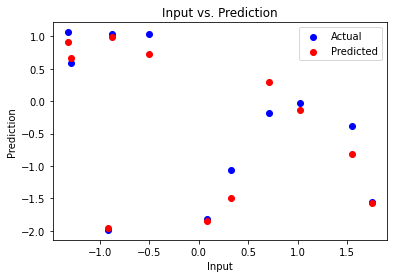

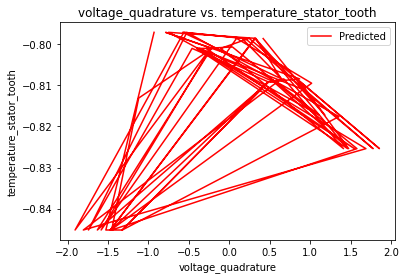

In [16]:
# model = LinearRegression()
# model=KernelRidge()
# model=BayesianRidge()
model = RandomForestRegressor()
# Train the model
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
import matplotlib.pyplot as plt
# Make predictions on the test data
x=np.zeros((8,60))
x[0]=np.full(60,-0.603)
x[1]=np.full(60,-0.393)
x[2]=np.full(60,-0.359)
x[3]=np.random.uniform(-2, 2, 60)
x[4]=np.full(60,0.0834)
x[5]=np.full(60,0.231)
x[6]=np.full(60,1.26) 
x[7]=np.full(60,1.19) 
varying_val=x[3].reshape((60,1))
x=x.T
print(x.shape)
print(varying_val.shape)
y_pred = model.predict(x)
pred=model.predict(X_test)
y=model.predict(X_test)
# Plot the input vs. predictions
plt.scatter(X_test.T[3].reshape(y_test.shape), y_test, color='b', label='Actual')
plt.scatter(X_test.T[3].reshape(y_test.shape), pred, color='r', label='Predicted')
plt.xlabel('Input')
plt.ylabel('Prediction')
plt.title('Input vs. Prediction')
plt.legend()
plt.show()
plt.clf()
plt.plot(varying_val, y_pred, color='r', label='Predicted')

plt.xlabel('voltage_quadrature')
plt.ylabel('temperature_stator_tooth')
plt.title('voltage_quadrature vs. temperature_stator_tooth')
plt.legend()
plt.show()